Text(0.5, 0, 'Time (hours)')

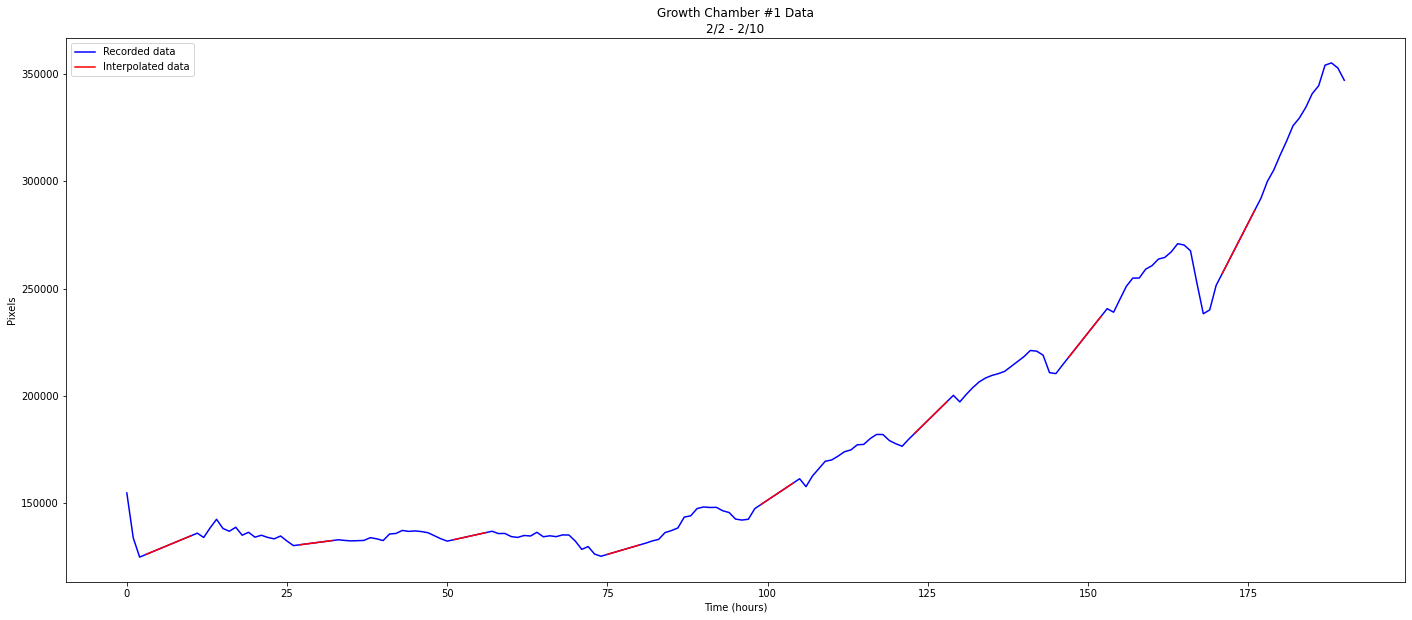

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [24, 10]

os.chdir("F:/Pi13P")
data = pd.read_csv("./data.csv",delimiter=",", header=0)[24:]['OlderInterestingPixels']
data = pd.DataFrame([f if f != 0 else None for f in data])
interpolatedData = data.interpolate()
interpolatedData =  interpolatedData.values.tolist()
interpolatedData = [i[0] for i in interpolatedData]
data = data.values.tolist()
data = [i[0] for i in data]
onlyInterpolatedData = []
for i in range(0, len(data)):
    if interpolatedData[i] == data[i]:
        onlyInterpolatedData.append(None)
    else:
        onlyInterpolatedData.append(interpolatedData[i])
plt.plot(interpolatedData, color="blue", label="Recorded data")
plt.plot(onlyInterpolatedData, color="red", label="Interpolated data")
plt.legend(loc='best')
plt.title("Growth Chamber #1 Data\n2/2 - 2/10")
plt.ylabel("Pixels")
plt.xlabel("Time (hours)")

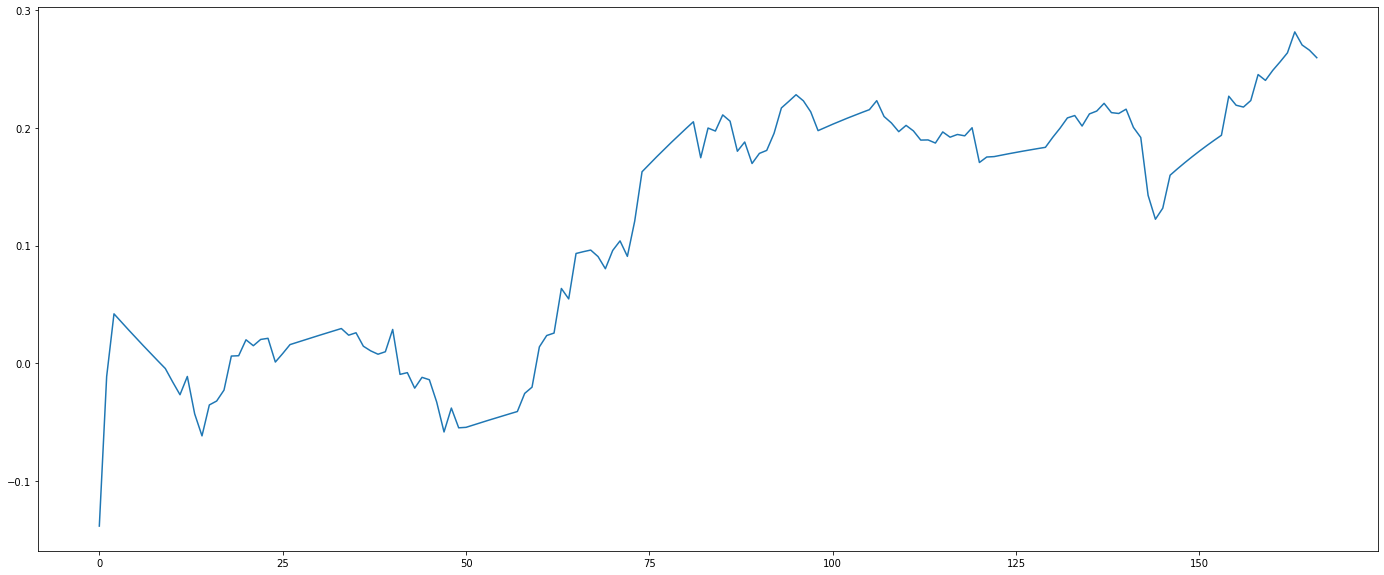

In [2]:
from tools import RGR
rgr = []
for i in range(24, len(interpolatedData)):
    rgr.append(RGR(interpolatedData[i - 24], interpolatedData[i]))
plt.plot(rgr)


Text(0.5, 0, 'Time')

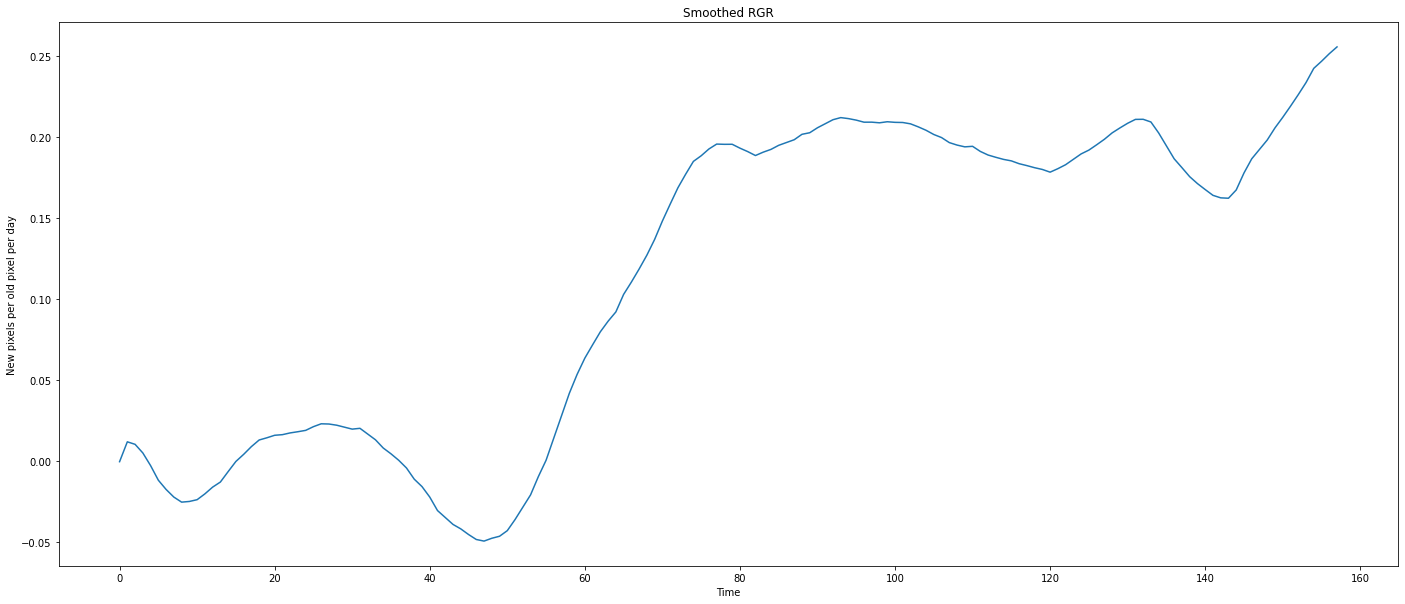

In [6]:
from tools import rollingAverage
plt.plot(rollingAverage(10, rgr))
plt.title("Smoothed RGR")
plt.ylabel("New pixels per old pixel per day")
plt.xlabel("Time")